##Importando bibliotecas

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Carregando base

In [2]:
entrada, saida  = load_boston(return_X_y=True)

print(entrada.shape)
print(saida.shape)

(506, 13)
(506,)


In [3]:
df_x = pd.DataFrame(data = entrada , columns=['CRIM','ZN','INDUS','CHAS','NOX','RM',
                                        'AGE','DIS','RAD','TAX','PTRATIO', 
                                        'B 1000(Bk - 0.63)^2', 'LSTAT %'])
df_y = pd.DataFrame(data = saida, columns=['MEDV'])

df_x.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210
RAD,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000


##Analise Pré-eliminares
 - anlisando graficos boxplot para verificar outliers
 - analisando graficos de distribuição linear

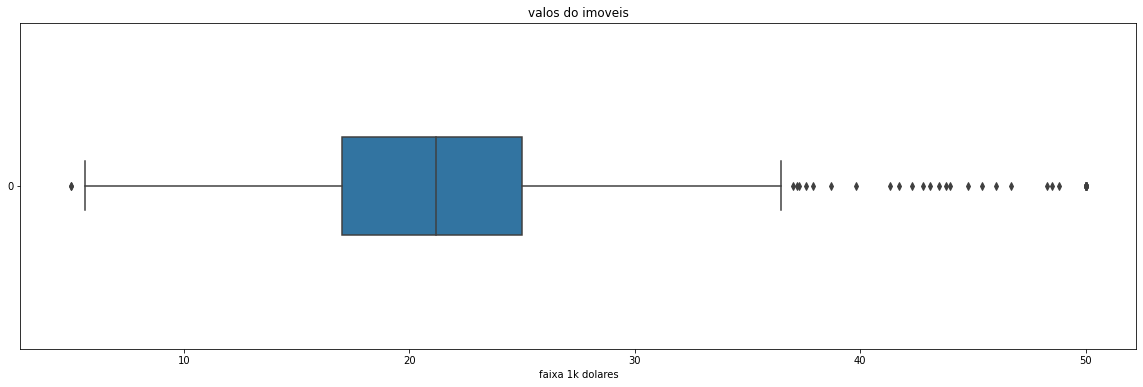

In [4]:
#criando boxplot
#um boxplot nada mais representa do que a mediana e os quartis de uma sequancia crescente de dados
#caso hajam outliers é importante retiralos para melhorar a performace do nosso modelo de regressao
ax = sns.boxplot(data= df_y['MEDV'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title("valos do imoveis")
ax.set_xlabel("faixa 1k dolares")
ax #é possivel visualizar dados discrepantes no boxplot - outliers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


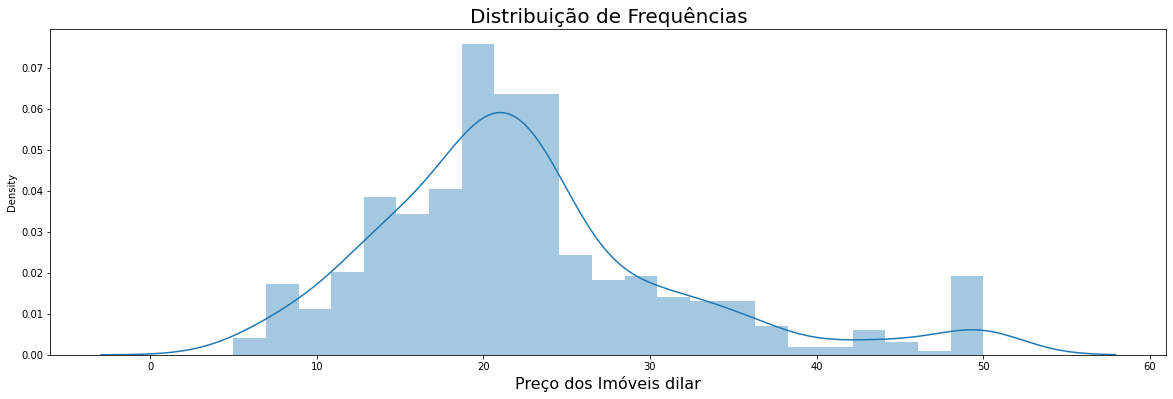

In [5]:
#distribuição de frequencias
#esse grafico no mostra uma distribuição de função gaussiana
#caso as frequencia apresentem fora da função é importante adaptaas para melhorar a performace do nosso modelo de regressao  
ax = sns.distplot(df_y['MEDV'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis dilar', fontsize=16)
ax #é possivel analizar que algumas distribuiçoes de frequencias estao fora da função 

##Pré-Processamento de dados e Trasnformação

In [6]:
df_x.drop(['CHAS'], axis=1) #retirando a coluna CHAS
#trocando os valores zerados para o valor medio da coluna
df_x['ZN'] = df_x['ZN'].replace(0,np.mean(df_x['ZN']))

df_x.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRIM,0.00632,0.027310,0.027290,0.032370,0.069050,0.029850,0.08829,0.14455,0.21124,0.17004
ZN,18.00000,11.363636,11.363636,11.363636,11.363636,11.363636,12.50000,12.50000,12.50000,12.50000
INDUS,2.31000,7.070000,7.070000,2.180000,2.180000,2.180000,7.87000,7.87000,7.87000,7.87000
CHAS,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.469000,0.469000,0.458000,0.458000,0.458000,0.52400,0.52400,0.52400,0.52400
RM,6.57500,6.421000,7.185000,6.998000,7.147000,6.430000,6.01200,6.17200,5.63100,6.00400
AGE,65.20000,78.900000,61.100000,45.800000,54.200000,58.700000,66.60000,96.10000,100.00000,85.90000
DIS,4.09000,4.967100,4.967100,6.062200,6.062200,6.062200,5.56050,5.95050,6.08210,6.59210
RAD,1.00000,2.000000,2.000000,3.000000,3.000000,3.000000,5.00000,5.00000,5.00000,5.00000
TAX,296.00000,242.000000,242.000000,222.000000,222.000000,222.000000,311.00000,311.00000,311.00000,311.00000


In [7]:
#função logaritimca 
#para resolver os problemas acima vamos aplicar uma função logaritimica em toda base
#os colunas que possuem um 1 somado serve para não serem zeradas

df_x['log_CRIM'] = np.log(df_x['CRIM'] + 1)
df_x['log_ZN'] = np.log(df_x['ZN'])
df_x['log_INDUS'] = np.log(df_x['INDUS'])
df_x['log_NOX'] = np.log(df_x['NOX'] + 1)
df_x['log_RM'] = np.log(df_x['RM'])
df_x['log_AGE'] = np.log(df_x['AGE'])
df_x['log_DIS'] = np.log(df_x['DIS'])
df_x['log_RAD'] = np.log(df_x['RAD'] + 1)
df_x['log_TAX'] = np.log(df_x['TAX'])
df_x['log_PTRATIO'] = np.log(df_x['PTRATIO'])
df_x['log_B 1000(Bk - 0.63)^2'] = np.log(df_x['B 1000(Bk - 0.63)^2'])
df_x['log_LSTAT %'] = np.log(df_x['LSTAT %'])

df_y['log_MEDV'] = np.log(df_y['MEDV'])

df_x.head().T

,0,1,2,3,4
CRIM,0.006320,0.027310,0.027290,0.032370,0.069050
ZN,18.000000,11.363636,11.363636,11.363636,11.363636
INDUS,2.310000,7.070000,7.070000,2.180000,2.180000
CHAS,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,0.538000,0.469000,0.469000,0.458000,0.458000
RM,6.575000,6.421000,7.185000,6.998000,7.147000
AGE,65.200000,78.900000,61.100000,45.800000,54.200000
DIS,4.090000,4.967100,4.967100,6.062200,6.062200
RAD,1.000000,2.000000,2.000000,3.000000,3.000000
TAX,296.000000,242.000000,242.000000,222.000000,222.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


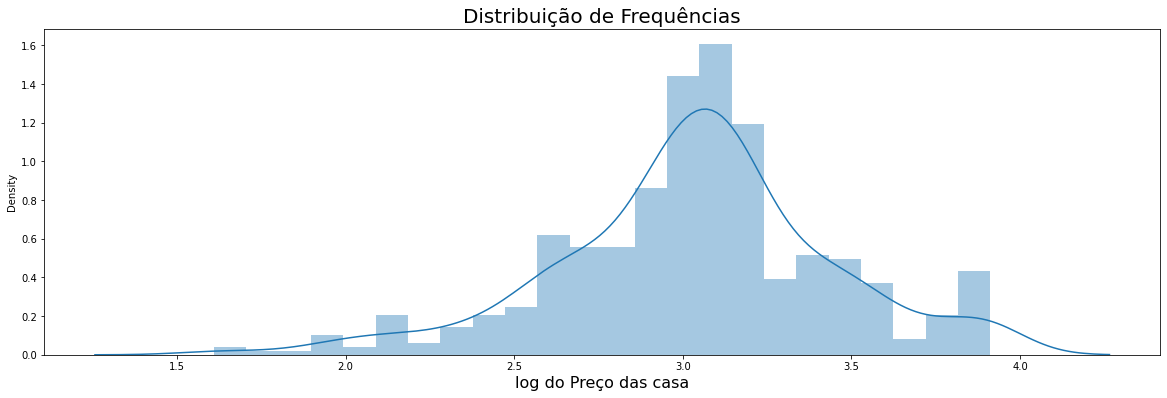

In [8]:
#verificando a nova distribuição de frequancias
ax = sns.distplot(df_y['log_MEDV'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço das casa', fontsize=16)
ax

##Criando e Treinando o modelo

In [9]:
#separando os dados
x = df_x[['log_CRIM', 'log_ZN', 'log_INDUS', 
          'log_NOX', 'log_RM','log_AGE',
          'log_DIS', 'log_RAD', 'log_TAX',
          'log_PTRATIO', 'log_B 1000(Bk - 0.63)^2', 'log_LSTAT %']]
y = df_y['log_MEDV']

x.tail().T

,501,502,503,504,505
log_CRIM,0.060747,0.044275,0.058986,0.103991,0.046320
log_ZN,2.430418,2.430418,2.430418,2.430418,2.430418
log_INDUS,2.479056,2.479056,2.479056,2.479056,2.479056
log_NOX,0.452985,0.452985,0.452985,0.452985,0.452985
log_RM,1.886008,1.811562,1.942476,1.916040,1.796747
log_AGE,4.235555,4.339902,4.510860,4.492001,4.391977
log_DIS,0.907694,0.827460,0.773574,0.870833,0.918289
log_RAD,0.693147,0.693147,0.693147,0.693147,0.693147
log_TAX,5.609472,5.609472,5.609472,5.609472,5.609472
log_PTRATIO,3.044522,3.044522,3.044522,3.044522,3.044522


In [10]:
#separando dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=2811)

print("foi separados %d dados para treino e %d dados para teste" % (len(x_treino), len(x_teste)))

foi separados 379 dados para treino e 127 dados para teste


In [11]:
#criando e treinando modelo 
modelo = LinearRegression()

modelo.fit(x_treino, y_treino)

previsao = modelo.predict(x_teste)

#calculando o MSE 
mse = np.mean((previsao - y_teste)**2) 

print("Erro quadratico Médio: %.3f " % mse)

Erro quadratico Médio: 0.035 


In [12]:
#coeficiente de relações
coef = pd.DataFrame(x_treino.columns)
coef['Coeficientes'] = pd.Series(modelo.coef_)

coef #pode-se percerber que os parametros que mais influenciam são RM, RAD e AGE

,0,Coeficientes
0,log_CRIM,-0.193209
1,log_ZN,-0.033500
2,log_INDUS,-0.024344
3,log_NOX,-0.691190
4,log_RM,0.409765
5,log_AGE,0.039482
6,log_DIS,-0.185774
7,log_RAD,0.220720
8,log_TAX,-0.145490
9,log_PTRATIO,-0.596601


In [13]:
#calculando r-squared
#vamos perceber que comparado ao exercicio 4 este modelo consege ter uma estimativa muito superior
print("percentual de r-squared: %.3f"  %(modelo.score(x_teste, y_teste)*100))

percentual de r-squared: 81.682


##Gerando visualização da Reta de Regressão

In [14]:
y_previsto = modelo.predict(x_treino)

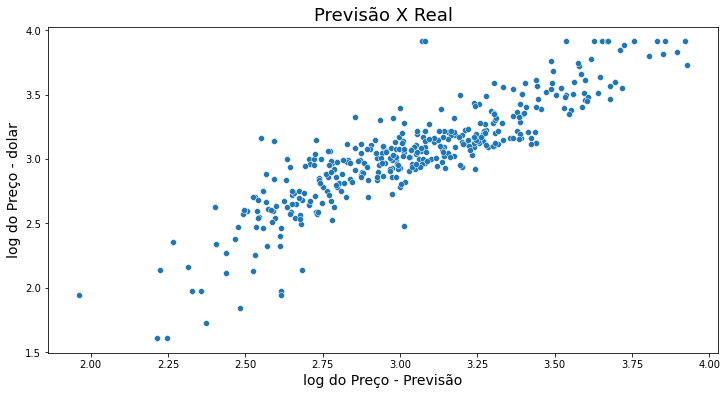

In [15]:
#criando um scaterplot para visualizarmos a regressao dos dados previstos
ax = sns.scatterplot(x=y_previsto, y=y_treino)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - dolar', fontsize=14)
ax

##Simulação Simples

In [16]:
CRIM  = 0.058986	
ZN  = 18
INDUS =  7.07       
NOX = 0.452985
RM = 4.86007
AGE = 61
DIS = 6
RAD = 4
TAX = 240      
PTRATIO = 17.5
B = 390
LSTAT = 2.94

entradas = [[np.log(CRIM+1), np.log(ZN), np.log(INDUS),
             np.log(NOX+1), np.log(RM), np.log(AGE),
             np.log(DIS), np.log(RAD+1), np.log(TAX),
             np.log(PTRATIO), np.log(B), np.log(LSTAT)]]

print('Faixa em k dolare: %.3f' %(np.exp(modelo.predict(entradas)[0])) + " $")

Faixa em k dolare: 34.211 $
